In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [3]:
Dots

,time,pedestrians,bicyclists,cars,buses,trucks,location
0,2019-10-28T00:00:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
1,2019-10-28T00:15:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
2,2019-10-28T00:30:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
3,2019-10-28T00:45:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
4,2019-10-28T01:00:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
5,2019-10-28T01:15:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
6,2019-10-28T01:30:00-04:00,0,0,1,0,0,Campus_Dr_&_Presidential_Ave
7,2019-10-28T01:45:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave
8,2019-10-28T02:00:00-04:00,0,0,1,0,0,Campus_Dr_&_Presidential_Ave
9,2019-10-28T02:15:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave


![title](dots_sensor.jpg)

![title](map.jpg)

In [85]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])
#pd.to_datetime(Dots['Date'], format='%Y%m%d')

In [86]:
Dots['StartTime'] = Dots['time'].str[11:19]
Dots['StartTime'] = pd.to_datetime(Dots['StartTime'])

In [87]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [38]:
Dots['location'].value_counts()

South_Gate_Northern_View             1348
Regents_Dr_&_Stadium_Dr_2            1348
Campus_Dr_At_Paint_Branch_Dr         1348
Campus_Dr_&_Presidential_Ave         1348
Regents_Dr_&_Stadium_Dr_3            1348
University_Blvd_&_Paint_Branch_Dr    1348
Stadium_Dr_East_Of_Regents_Dr        1348
Paint_Branch_Dr_At_Campus_Dr         1348
South_Gate_South_View                1348
Regents_Dr_&_Stadium_Dr_1            1348
Name: location, dtype: int64

In [89]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [90]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [95]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [98]:
Dots.sample(5)

,time,pedestrians,bicyclists,cars,buses,trucks,location,Date,StartTime,location_5,weekday
7796,2019-11-08 00:00:00,3,0,26,1,0,Regents_Dr_&_Stadium_Dr_3,2019-11-08,2020-02-22 00:00:00,Stadium Drive & Regents Drive,5
100,2019-10-29 01:00:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-29,2020-02-22 01:00:00,Campus_Dr_&_Presidential_Ave,2
13475,2019-11-10 23:45:00,0,0,2,0,0,University_Blvd_&_Paint_Branch_Dr,2019-11-10,2020-02-22 23:45:00,University_Blvd_&_Paint_Branch_Dr,7
1061,2019-11-08 01:15:00,0,0,1,0,0,Campus_Dr_&_Presidential_Ave,2019-11-08,2020-02-22 01:15:00,Campus_Dr_&_Presidential_Ave,5
4393,2019-10-31 15:15:00,1079,442,184,24,21,Regents_Dr_&_Stadium_Dr_1,2019-10-31,2020-02-22 15:15:00,Stadium Drive & Regents Drive,4


In [45]:
Dots['location_5'].value_counts()

Stadium Drive & Regents Drive                    5392
Campus Drive & Paint Branch Drive                2696
Baltimore Avenue & Regents Drive (South Gate)    2696
Campus_Dr_&_Presidential_Ave                     1348
University_Blvd_&_Paint_Branch_Dr                1348
Name: location_5, dtype: int64

In [26]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

<Figure size 576x2160 with 0 Axes>

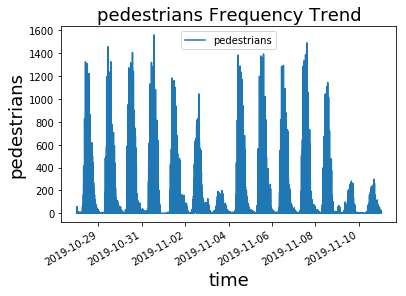

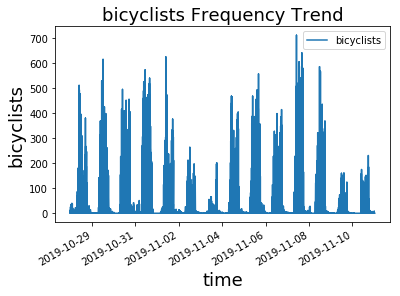

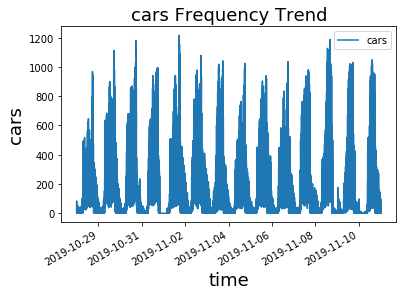

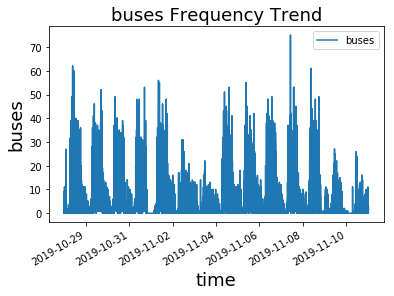

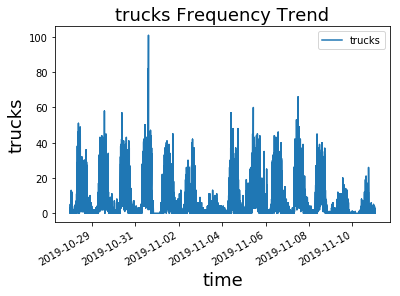

In [107]:
plt.figure(figsize=(8,30))

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots.plot('time',types
             )

    plt.xlabel('time', fontsize =18)
    plt.ylabel(types,fontsize =18)
    plt.title(types + ' Frequency Trend',fontsize =18, color = "k")
    plt.savefig("figs/" + types +".png",dpi=100) 
    plt.show()


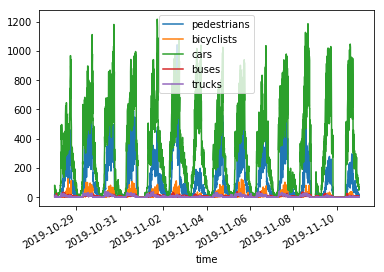

In [104]:
Dots[Dots['location_5']== "Baltimore Avenue & Regents Drive (South Gate)"].plot(kind = 'line', 
                                                                            y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                                                           x = 'time')